In [7]:
# Loads a grayscale PPM image as a NumPy matrix. Don't worry about understanding how this code block works!
def readPPM(filename):
    f = open(filename, mode="rb") # Open the file for binary data.
    header = f.readline().split()
    if header[0] != b"P6": raise Exception("Not a valid PPM image file!")
    width = int(header[1])
    height = int(header[2])
    pixels = np.frombuffer(f.read(), dtype=np.uint8) # Read the pixel bytes into a NumPy array.
    f.close()

    # Shape the array into a matrix that represents the grayscale image.
    # The PPM pixels use RGB colors, so take just 1 out of every 3 elements.
    return np.reshape(pixels[np.arange(0, pixels.size, 3)], [height, width]).astype(float)

SLIGHT BLUR COMPLETED
SIGNIFICANT BLUR COMPLETED
SEVERE BLUR COMPLETED
SLIGHT DEBLUR COMPLETED
SIGNIFICANT DEBLUR COMPLETED
SEVERE DEBLUR COMPLETED
SLIGHT INVERSE COMPLETED
SIGNIFICANT INVERSE COMPLETED
SEVERE INVERSE COMPLETED


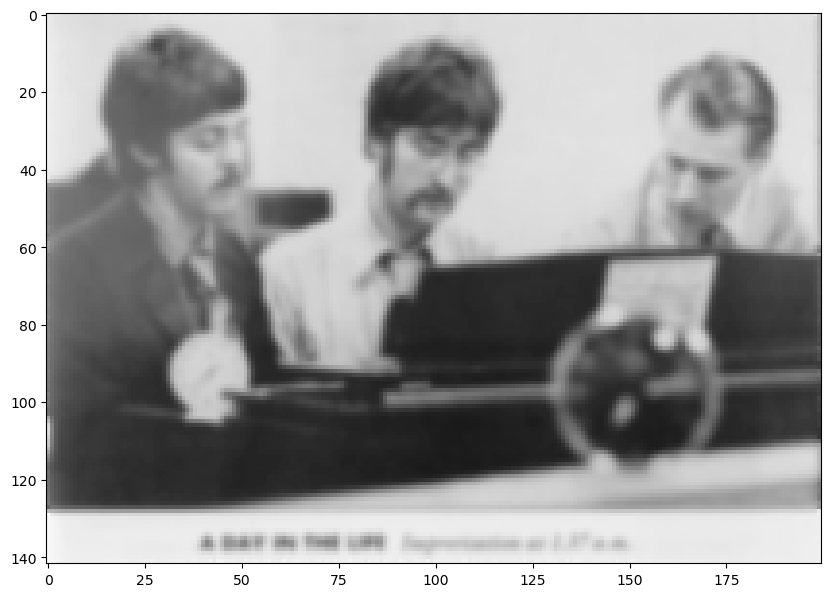

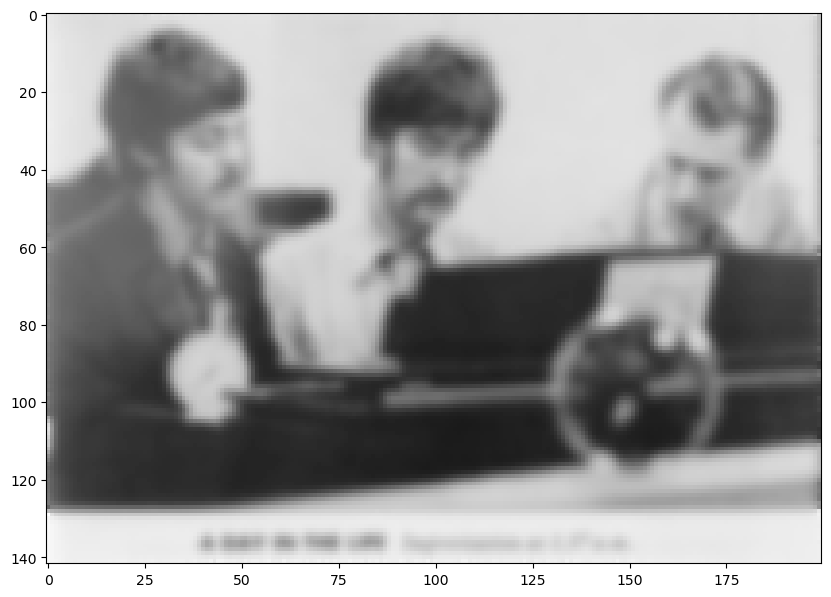

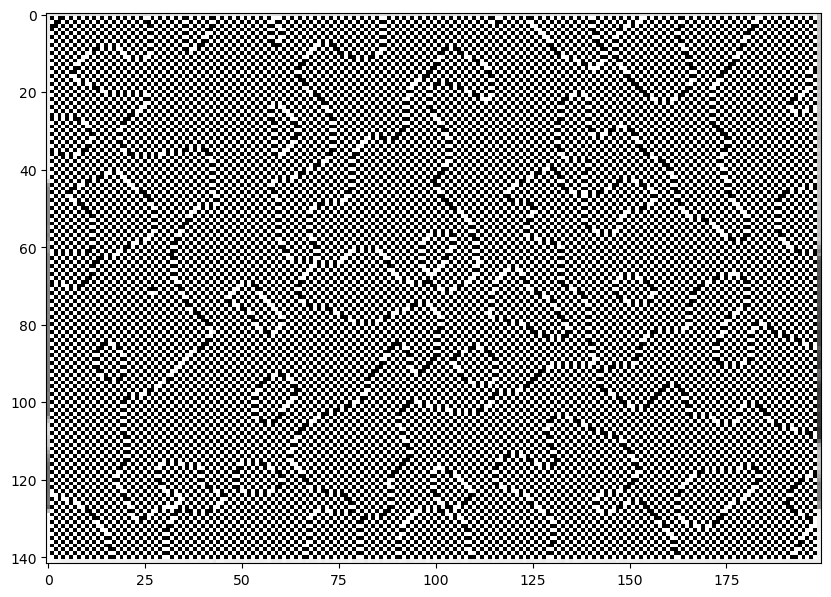

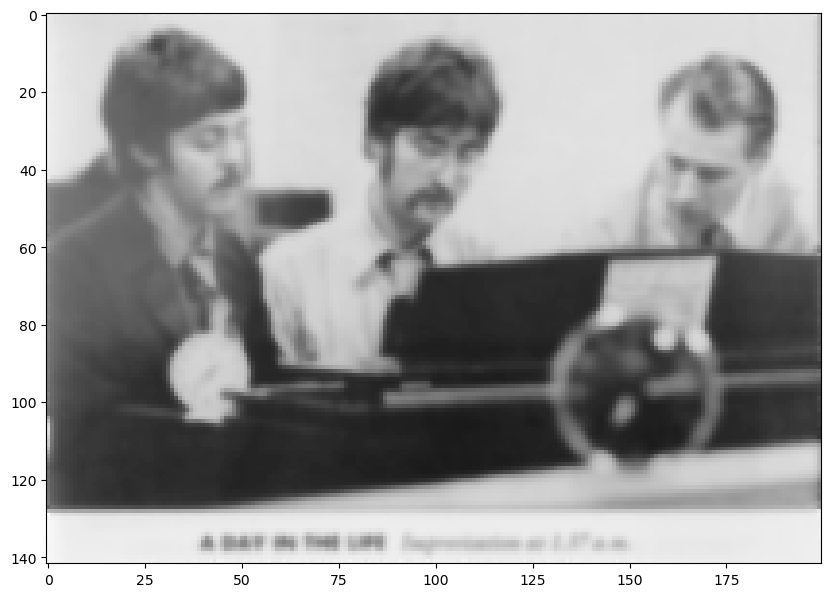

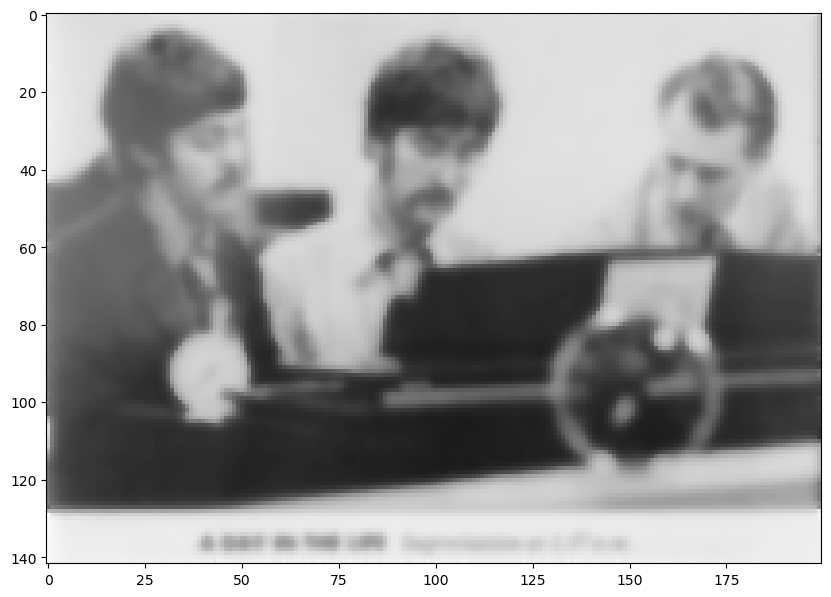

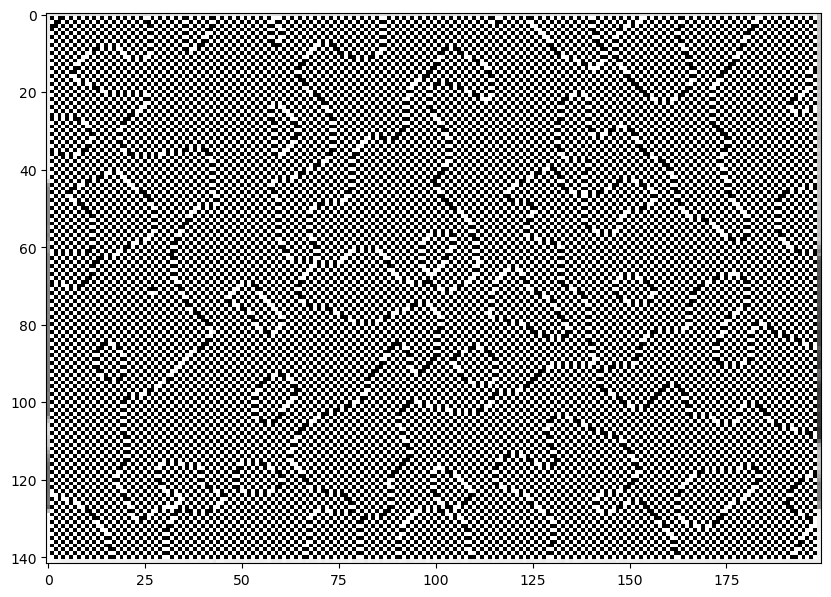

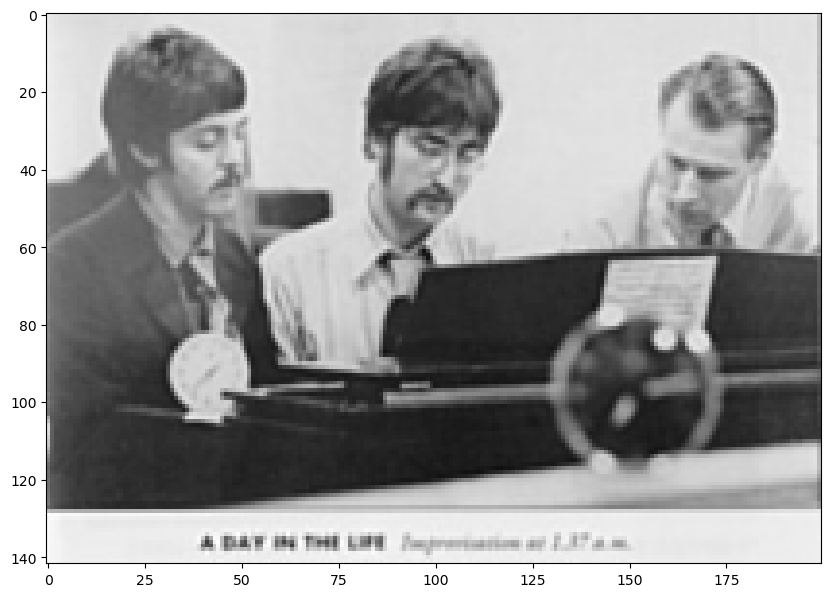

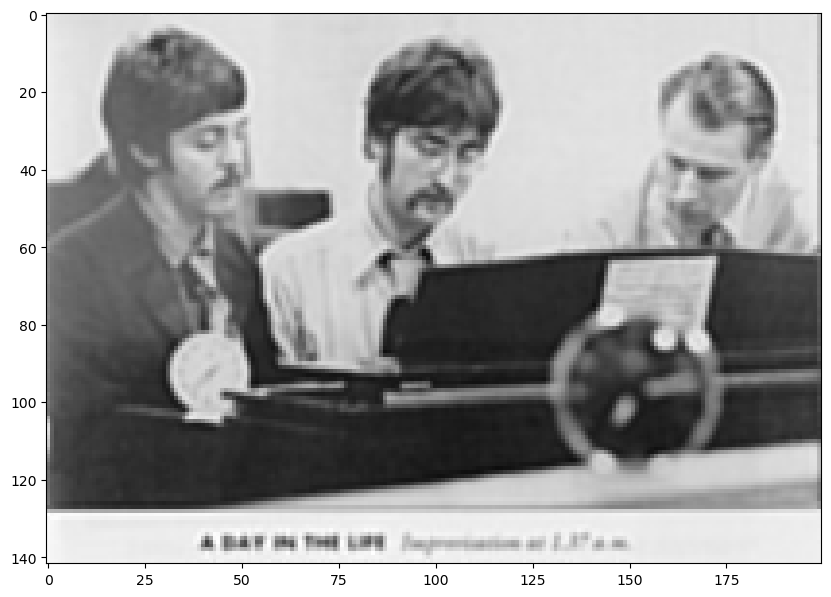

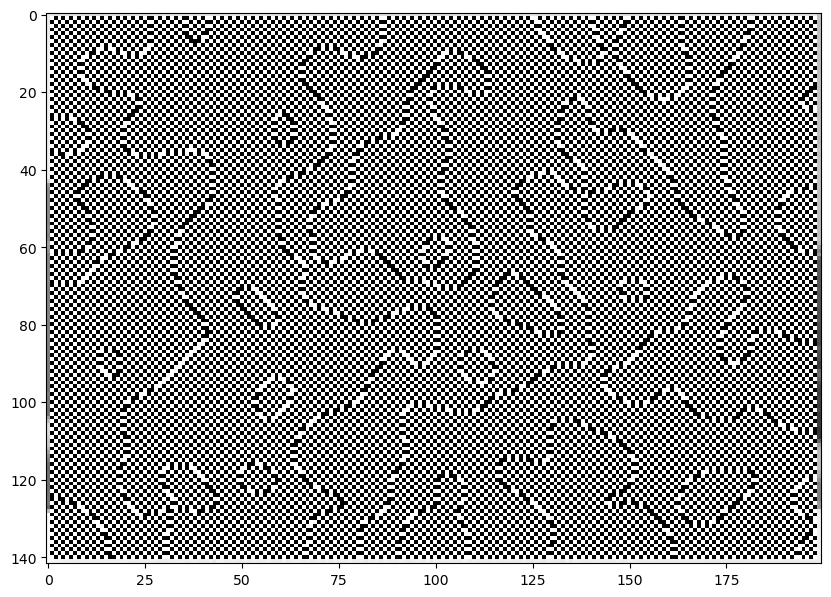

In [11]:
#Part 1) Work with the picture of the Beatles (Beatle John, Beatle Paul, and producer
#George Martin) called "Beatles.ppm". (a) The program is currently set up to apply the
#heat equation to the image, which will blur it. Select three different time values to
#correspond to slight, significant, and severe blurring. (b) Apply the shock filter equation
#to each of the three images to try to sharpen your edges in an attempt to approximate
#deblurring.
import numpy as np
import matplotlib.pyplot as plt
def read_ppm(filename):
    with open(filename, 'rb') as f:
        header_line = f.readline().decode('utf-8').strip()
        header_parts = header_line.split()
        if len(header_parts) == 4:
            width, height = map(int, header_parts[1:3])
            data = np.frombuffer(f.read(), dtype=np.uint8).reshape((height, width, 3))
            return data[..., 0] / 255.0
        else:
            raise ValueError('Invalid PPM file format')

def write_ppm(filename, image, format='P6'):
    height, width = image.shape
    max_val = 255
    with open(filename, 'w' if format == 'P3' else 'wb') as f:
        if format == 'P3':
            f.write(f'P3 {width} {height} {max_val}\n')
            img_data = (image * 255).astype(int)
            for i in range(height):
                for j in range(width):
                    val = img_data[i, j]
                    f.write(f'{val} {val} {val} ')
                f.write('\n')
        else:
            f.write(f'P6 {width} {height} {max_val}\n'.encode('utf-8'))
            img_data = (image * 255).astype(np.uint8)
            rgb_data = np.repeat(img_data[..., np.newaxis], 3, axis=-1)
            f.write(rgb_data.tobytes())

def heat_equation(image, dt, num_steps):
    result = image.copy()
    for _ in range(num_steps):
        new_result = result.copy()
        for i in range(1, result.shape[0] - 1):
            for j in range(1, result.shape[1] - 1):
                u_xx = result[i, j+1] - 2 * result[i, j] + result[i, j-1]
                u_yy = result[i+1, j] - 2 * result[i, j] + result[i-1, j]
                new_result[i, j] = result[i, j] + dt * (u_xx + u_yy)
        result = new_result
    return np.clip(result, 0, 1)
def m(x, y):
    return min(x, y) if x > 0 and y > 0 else max(x, y) if x < 0 and y < 0 else 0

def shock_filter(image, dt, num_steps):
    result = image.copy()
    for _ in range(num_steps):
        new_result = result.copy()
        for i in range(1, result.shape[0] - 1):
            for j in range(1, result.shape[1] - 1):
                u_x_forward = result[i, j+1] - result[i, j]
                u_x_backward = result[i, j] - result[i, j-1]
                u_x = m(u_x_forward, u_x_backward)
                u_y_forward = result[i+1, j] - result[i, j]
                u_y_backward = result[i, j] - result[i-1, j]
                u_y = m(u_y_forward, u_y_backward)
                u_xx = result[i, j+1] - 2 * result[i, j] + result[i, j-1]
                u_yy = result[i+1, j] - 2 * result[i, j] + result[i-1, j]
                new_result[i, j] = result[i, j] - dt * np.sqrt(u_x**2 + u_y**2) * (u_xx + u_yy)
        result = new_result
    return np.clip(result, 0, 1)

beatles = read_ppm('BEATLES.PPM')
slight_blur = heat_equation(beatles, 0.1, 5)

write_ppm('SLIGHT_BLUR.ppm', slight_blur)

plt.figure(figsize = (10,10))
plt.imshow(readPPM('SLIGHT_BLUR.ppm'), cmap='gray', vmin=0, vmax=255)

print("SLIGHT BLUR COMPLETED")
significant_blur = heat_equation(beatles, 0.1, 10)
write_ppm('SIGNIFICANT_BLUR.ppm', significant_blur)

plt.figure(figsize = (10,10))
plt.imshow(readPPM('SIGNIFICANT_BLUR.ppm'), cmap='gray', vmin=0, vmax=255)

print("SIGNIFICANT BLUR COMPLETED")
severe_blur = heat_equation(beatles, 1, 50)
write_ppm('SEVERE_BLUR.ppm', severe_blur)

plt.figure(figsize = (10,10))
plt.imshow(readPPM('SEVERE_BLUR.ppm'), cmap='gray', vmin=0, vmax=255)

print("SEVERE BLUR COMPLETED")

slight_deblur = shock_filter(slight_blur, 0.1, 15)
write_ppm('SLIGHT_DEBLUR.ppm', slight_deblur)
print("SLIGHT DEBLUR COMPLETED")

plt.figure(figsize = (10,10))
plt.imshow(readPPM('SLIGHT_DEBLUR.ppm'), cmap='gray', vmin=0, vmax=255)

significant_deblur = shock_filter(significant_blur, 0.1, 40)
write_ppm('SIGNIFICANT_DEBLUR.ppm', significant_deblur)
print("SIGNIFICANT DEBLUR COMPLETED")

plt.figure(figsize = (10,10))
plt.imshow(readPPM('SIGNIFICANT_DEBLUR.ppm'), cmap='gray', vmin=0, vmax=255)

severe_deblur = shock_filter(severe_blur, 0.1, 500)
write_ppm('SEVERE_DEBLUR.ppm', severe_deblur)
print("SEVERE DEBLUR COMPLETED")

plt.figure(figsize = (10,10))
plt.imshow(readPPM('SEVERE_DEBLUR.ppm'), cmap='gray', vmin=0, vmax=255)

slight_inverse = heat_equation(slight_blur, -0.1, 6)
write_ppm('SLIGHT_INVERSE.ppm', slight_inverse)
print("SLIGHT INVERSE COMPLETED")

plt.figure(figsize = (10,10))
plt.imshow(readPPM('SLIGHT_INVERSE.ppm'), cmap='gray', vmin=0, vmax=255)

significant_inverse = heat_equation(significant_blur, -0.1, 12)
write_ppm('SIGNIFICANT_INVERSE.ppm', significant_inverse)
print("SIGNIFICANT INVERSE COMPLETED")

plt.figure(figsize = (10,10))
plt.imshow(readPPM('SIGNIFICANT_INVERSE.ppm'), cmap='gray', vmin=0, vmax=255)

severe_inverse = heat_equation(severe_blur, -0.1, 60)
write_ppm('SEVERE_INVERSE.ppm', severe_inverse)
print("SEVERE INVERSE COMPLETED")

plt.figure(figsize = (10,10))
plt.imshow(readPPM('SEVERE_INVERSE.ppm'), cmap='gray', vmin=0, vmax=255)


In [ ]:
#Part 2) Work with the triangle image that contains no noise ("tri.ppm"). Apply the level
#set equation to the triangle. Select 5 different values of time that demonstrate the
#evolution of the image -- i.e., the dissipation of the edges, the formation of a circular
#region, and finally, the shrinking of the circular region to a point.

def level_set(image, dt, num_steps):
    u = image.copy()
    for _ in range(num_steps):
        new_u = u.copy()
        for i in range(1, u.shape[0] - 1):
            for j in range(1, u.shape[1] - 1):
                u_x = (u[i, j+1] - u[i, j-1]) / 2
                u_y = (u[i+1, j] - u[i-1, j]) / 2
                u_xx = u[i, j+1] - 2 * u[i, j] + u[i, j-1]
                u_yy = u[i+1, j] - 2 * u[i, j] + u[i-1, j]
                u_xy = (u[i+1, j+1] - u[i+1, j-1] - u[i-1, j+1] + u[i-1, j-1]) / 4
                new_u[i, j] = u[i, j] + dt * (u_xx * u_y**2 - 2 * u_xy * u_x * u_y + u_yy * u_x**2) / (u_x**2 + u_y**2 + 1e-8)
        u = new_u
    return np.clip(u, 0, 1)

triangle = read_ppm('TRI.PPM')
dissipation = level_set(triangle, 0.2, 50)
write_ppm('DISSIPATION.ppm', dissipation)
print("DISSIPATION COMPLETED")
formation = level_set(dissipation, 0.2, 1000)
write_ppm('FORMATION.ppm', formation)
print("FORMATION COMPLETED")
formation_2 = level_set(formation, 0.2, 5000)
write_ppm('FORMATION_2.ppm', formation_2)
print("FORMATION 2 COMPLETED")
shrinking = level_set(formation_2, 0.2, 5000)
write_ppm('SHRINKING.ppm', shrinking)
shrinking_2 = level_set(shrinking, 0.2, 5000)
write_ppm('SHRINKING_2.ppm', shrinking_2)
print("SHRINKING 2 COMPLETED")

In [ ]:
#Part 3) Work with the triangle with light noise ("trilgt.ppm"), the triangle with medium
#noise ("trimed.ppm"), the triangle with heavy noise ("trihvy.ppm"), and the picture of J.
#R. Bob Dobbs (the 1950s looking guy with the pipe) in "Dobbs.ppm". To each of these 4
#images (a) apply the level set equation and find the values of time that you think make
#the images look the best; then take the original images and (b) apply the Fatemi equation
#(which is the equation with “-alpha(u-f)” appended to the regular level set equation,
#named after a previous Math 144 student who wanted to have a PDE named after them!)
#and find the values of alpha that you think make the images look the best.

def fatemi(image, dt, alpha, num_steps):
    u = image.copy()
    for _ in range(num_steps):
        new_u = u.copy()
        for i in range(1, u.shape[0] - 1):
            for j in range(1, u.shape[1] - 1):
                u_x = (u[i, j+1] - u[i, j-1]) / 2
                u_y = (u[i+1, j] - u[i-1, j]) / 2
                u_xx = u[i, j+1] - 2 * u[i, j] + u[i, j-1]
                u_yy = u[i+1, j] - 2 * u[i, j] + u[i-1, j]
                u_xy = (u[i+1, j+1] - u[i+1, j-1] - u[i-1, j+1] + u[i-1, j-1]) / 4
                u_t = (u_xx * u_y**2 - 2 * u_xy * u_x * u_y + u_yy * u_x**2) / (u_x**2 + u_y**2 + 1e-8) - alpha * (u[i, j] - image[i, j])
                new_u[i, j] = u[i, j] + dt * u_t
        u = new_u
    return np.clip(u, 0, 1)

triangle_light = read_ppm('TRILGT.PPM')
triangle_medium = read_ppm('TRIMED.PPM')
triangle_heavy = read_ppm('TRIHVY.PPM')
dobbs = read_ppm('DOBBS.PPM')
triangle_light_level_set = level_set(triangle_light, 0.1, 60)
write_ppm('TRIANGLE_LIGHT_LEVEL_SET.ppm', triangle_light_level_set)
print("TRIANGLE LIGHT LEVEL SET COMPLETED")
triangle_medium_level_set = level_set(triangle_medium, 0.1, 100)
write_ppm('TRIANGLE_MEDIUM_LEVEL_SET.ppm', triangle_medium_level_set)
print("TRIANGLE MEDIUM LEVEL SET COMPLETED")
triangle_heavy_level_set = level_set(triangle_heavy, 0.1, 150)
write_ppm('TRIANGLE_HEAVY_LEVEL_SET.ppm', triangle_heavy_level_set)
print("TRIANGLE HEAVY LEVEL SET COMPLETED")
dobbs_level_set = level_set(dobbs, 0.1, 10)
write_ppm('DOBBS_LEVEL_SET.ppm', dobbs_level_set)
print("DOBBS LEVEL SET COMPLETED")
triangle_light_fatemi = fatemi(triangle_light, 0.1, 0.2, 1000)
write_ppm('TRIANGLE_LIGHT_FATEMI.ppm', triangle_light_fatemi)
print("TRIANGLE LIGHT FATEMI COMPLETED")
triangle_medium_fatemi = fatemi(triangle_medium, 0.1, 0.1, 1000)
write_ppm('TRIANGLE_MEDIUM_FATEMI.ppm', triangle_medium_fatemi)
print("TRIANGLE MEDIUM FATEMI COMPLETED")
triangle_heavy_fatemi = fatemi(triangle_heavy, 0.1, 0.05, 1000)
write_ppm('TRIANGLE_HEAVY_FATEMI.ppm', triangle_heavy_fatemi)
print("TRIANGLE HEAVY FATEMI COMPLETED")
dobbs_fatemi = fatemi(dobbs, 0.1, 0.5, 1000)
write_ppm('DOBBS_FATEMI.ppm', dobbs_fatemi)
print("DOBBS FATEMI COMPLETED")

In [ ]:
#Part 4) Work with the "Love" picture ("Love.ppm"), which comes from a really corny
#1950s Romance Comic Book. Apply the shock filter equation to the image.

love = read_ppm('LOVE.PPM')
love_shock = shock_filter(love, 0.01, 100)
write_ppm('LOVE_SHOCK.ppm', love_shock)
print("LOVE SHOCK COMPLETED")
love_reverse = heat_equation(love, -0.01, 100)
write_ppm('LOVE_REVERSE.ppm', love_reverse)
print("LOVE REVERSE COMPLETED")

In [ ]:
#Part 5) Work with the "Love" picture that is blurred and then had noise added
#("Lovens.ppm"). Apply either the level set equation or the Fatemi equation to remove the
#noise and then apply the shock filter equation to the resulting image. Use values of time
#(or values of alpha) for both equations that lead to the best image you can produce.

love_noisy = read_ppm('LOVENS.PPM')
love_noisy_fatemi = fatemi(love_noisy, 0.1, 0.4, 1000)
write_ppm('LOVE_NOISY_FATEMI.ppm', love_noisy_fatemi)
print("LOVE NOISY FATEMI COMPLETED")
love_noisy_fatemi_shock = shock_filter(love_noisy_fatemi, 0.01, 300)
write_ppm('LOVE_NOISY_FATEMI_SHOCK.ppm', love_noisy_fatemi_shock)
print("LOVE NOISY FATEMI SHOCK COMPLETED")
love_noisy_fatemi_reverse = heat_equation(love_noisy_fatemi, -0.01, 20)
write_ppm('LOVE_NOISY_FATEMI_REVERSE.ppm', love_noisy_fatemi_reverse)
print("LOVE NOISY FATEMI REVERSE COMPLETED")